In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [3]:
path1 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [4]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

path4 = r'E:\netData\MAGzip\MAG\hitlst.zip'
f4 = pd.read_csv(path4)

In [9]:
f1['hit'] = f1['paperid'].map(dict(zip(f4['0'] , ['hit']*len(f4))))

In [10]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# fig 3

In [11]:
id1 = 2086860422
id2 = 1559264985
id3 = 2011580247
d1 = f1[f1['Nobel'] == id1]
d2 = f1[f1['Nobel'] == id2]
d3 = f1[f1['Nobel'] == id3]

In [16]:
x1 = d1.loc[d1['type'] == 'DC','paperyear'].values
x2 = d1.loc[d1['type'] == 'CC','paperyear'].values
y1 = d1.loc[d1['type'] == 'DC','cit'].values
y2 = d1.loc[d1['type'] == 'CC','cit'].values
y2 = [-i for i in y2]

In [20]:
x1h =d1.loc[(d1['type'] == 'DC') & (d1['hit'] == 'hit'),'paperyear'].values
x2h =d1.loc[(d1['type'] == 'CC') & (d1['hit'] == 'hit'),'paperyear'].values
y1h =d1.loc[(d1['type'] == 'DC') & (d1['hit'] == 'hit'),'cit'].values
y2h =d1.loc[(d1['type'] == 'CC') & (d1['hit'] == 'hit'),'cit'].values
y2h = [-i for i in y2h]

Text(0, 0.5, 'Citation')

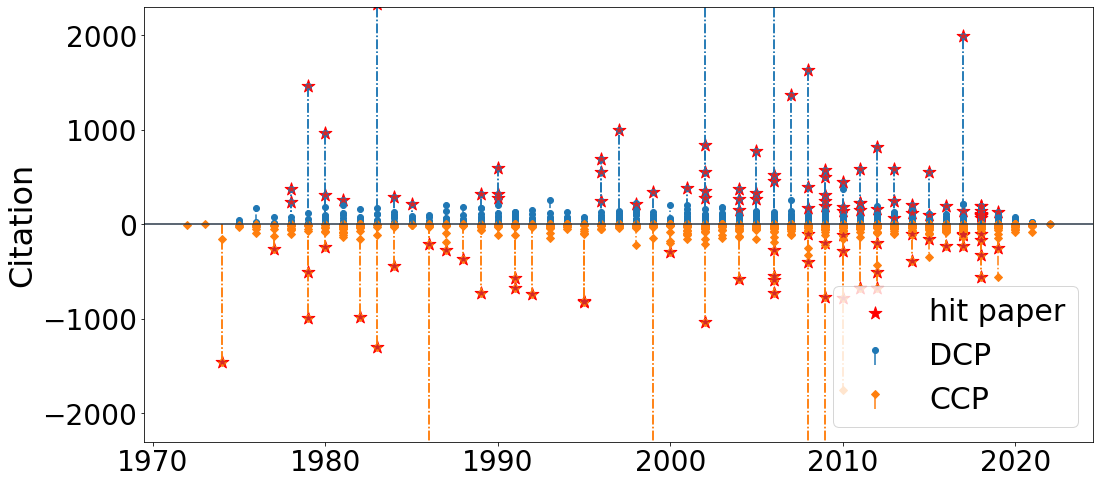

In [36]:
f, ax = plt.subplots(figsize=(17, 8))

ax.stem(x1, y1, linefmt='C0-.', markerfmt='C0o', basefmt=' ', label = 'DCP')
ax.stem(x2, y2, linefmt='C1-.', markerfmt='C1D', basefmt=' ', label = 'CCP')

ax.stem(x1h, y1h, linefmt='C0-.', markerfmt='C3*', basefmt=' ' )
ax.stem(x2h, y2h, linefmt='C1-.', markerfmt='C3*', basefmt=' ' )

ax.scatter(x1h, y1h, s=180, marker='*',color = 'red',alpha = 1)
ax.scatter(x2h, y2h, s=180, marker='*',color = 'red' , label = 'hit paper',alpha = 1)

ax.axhline(0,ls = "-",color = '#283747')
plt.ylim(-2300,2300)
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.legend(fontsize = 30 , loc = 'lower right')
plt.ylabel(r'Citation',fontsize = 32)
# plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\a1.png",bbox_inches = 'tight')

In [39]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'hit']
d2 = f12.loc[f12['type'] == 'DC'  ,  'hit']
d3 = f13.loc[f13['type'] == 'DC'  ,  'hit']
d5 = f11.loc[f11['type'] == 'CC'  ,  'hit']
d6 = f12.loc[f12['type'] == 'CC'  ,  'hit']
d7 = f13.loc[f13['type'] == 'CC'  ,  'hit']
d11 = d1.dropna()
d12 = d2.dropna()
d13 = d3.dropna()
d15 = d5.dropna()
d16 = d6.dropna()
d17 = d7.dropna()
d = [len(d11)/len(d1),len(d12)/len(d2),len(d13)/len(d3),len(d15)/len(d5),len(d16)/len(d6),len(d17)/len(d7)]

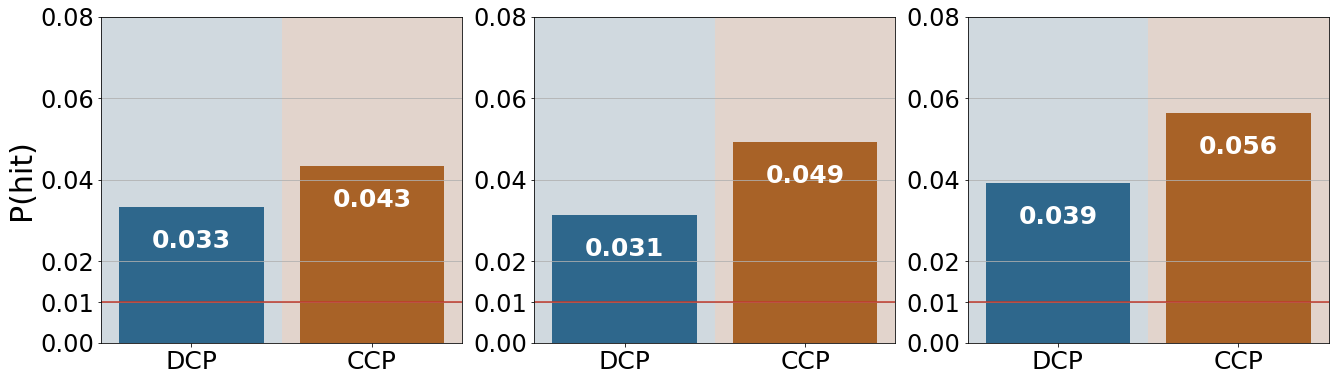

In [50]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, color= colors,alpha=0.9)
    ax.yaxis.grid(True)
    plt.ylim(0,0.08)
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-0.01 , str(np.round(dd[i] , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,0.01,0.02,0.04,0.06,0.08],size = 24)
    plt.axhline(y = 0.01 , c = '#C0392B')
    if _ == 0:
        plt.ylabel(r'P(hit)',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

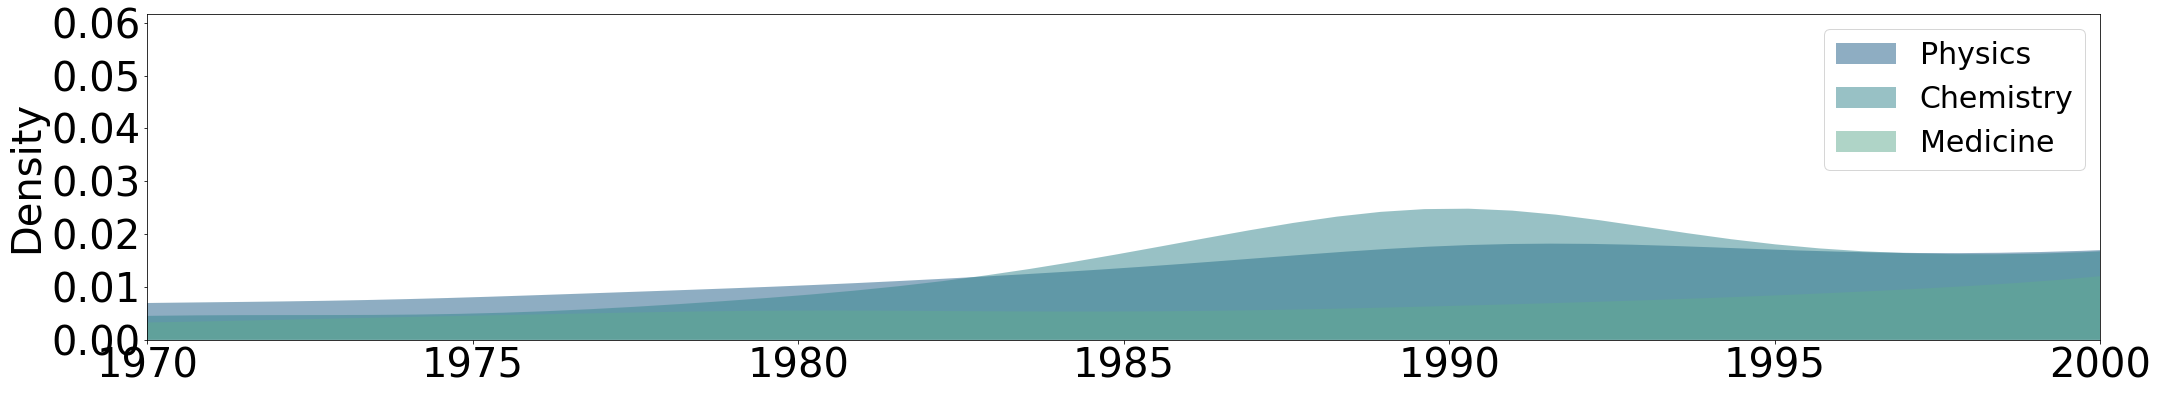

In [192]:
f, ax = plt.subplots(figsize=(35, 6))
sns.kdeplot(data=f1h, x="paperyear" , hue = 'Field',fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

#ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xlim((1970 , 2000))
plt.xticks( size = 40)
plt.yticks( size = 40)

plt.ylabel("Density" , fontsize = 40)
plt.legend(labels = ['Physics','Chemistry','Medicine'],fontsize = 30)

ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\c.pdf",bbox_inches = 'tight')

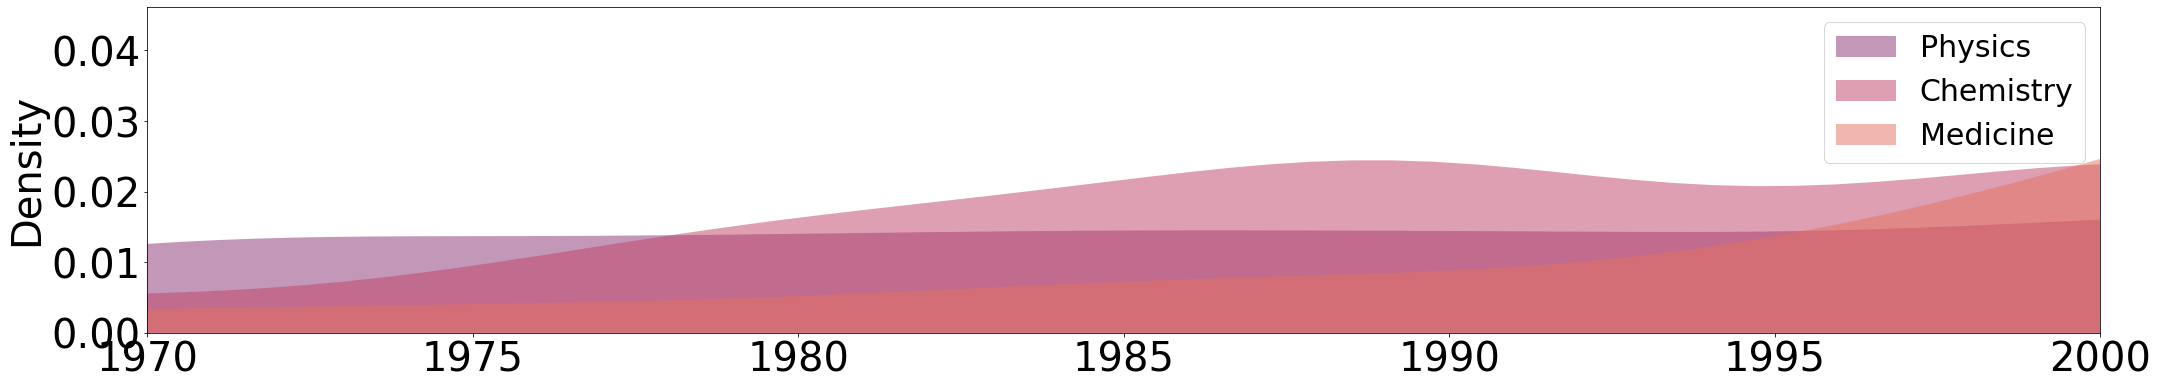

In [191]:
f, ax = plt.subplots(figsize=(35, 6))
sns.kdeplot(data=f2h, x="paperyear" , hue = 'Field' , fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0,)

#ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.xlim((1970 , 2000))
plt.xticks( size = 40)
plt.yticks( size = 40)

plt.ylabel("Density" , fontsize = 40)
#plt.xlabel("year" , fontsize = 40)
plt.legend(labels = ['Physics','Chemistry','Medicine'],fontsize = 30)
# plt.xticks([1,2],['Disruptive\n Citing Papers' , 'Consolidating\n Citing Papers'],fontsize = 25)
# plt.title(r'Probability to Become Hit',fontsize = 35)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\ASIST Disruptive citation patterns\fig\fig 4.1\c2.pdf",bbox_inches = 'tight')

